# Prediction of Iris Plant Class

The Iris data set is a fundamental data set used to illustrate classification models. 

Import libraries and get the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import lcplot
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species         object
dtype: object

In our data set, the features that we have are sepal length and width and petal length and width. The goal is to see how each of the features is related to the species classification and if we can use the given features to predict the species.

## Exploratory Data Analysis

Visual plots can give a lot of information about a data set. The `scatter_matrix` function plots pairwise scatter plots with histograms for each variable on the diagonal. Several of the variables show strong linear correlation, but the strongest relationship seems to be between petal width and petal length. For linear regression, strongly correlated variables would not give independent information and should likely not be included together in a model; however, they can still provide value for classification.

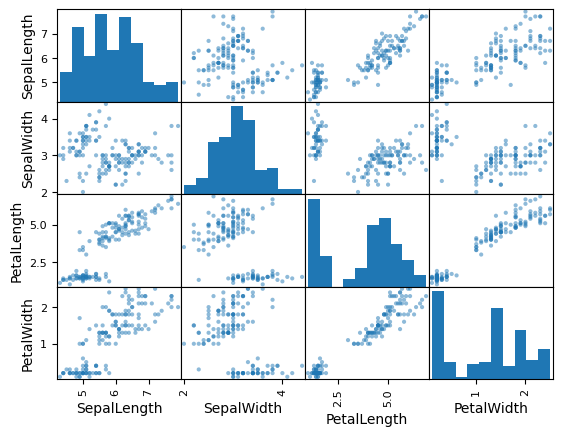

In [4]:
pd.plotting.scatter_matrix(data)
plt.show()

The `describe` function can be used to quickly get a snapshot of the statistical characteristics of the different features.

In [5]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's look at the distributions of the different variables for each classification. The goal with these plots is to determine what features separate the different classifications the most. 

Text(0.5, 1.0, 'Sepal Width')

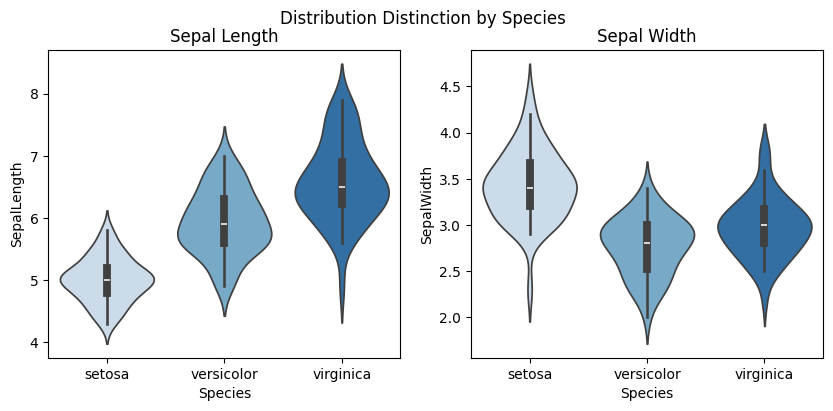

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Distribution Distinction by Species')

seaborn.violinplot(ax=axes[0], x='Species',y='SepalLength', hue='Species', data=data, palette="Blues")
axes[0].set_title('Sepal Length')

seaborn.violinplot(ax=axes[1], x='Species',y='SepalWidth', hue='Species', data=data, palette="Blues")
axes[1].set_title('Sepal Width')

Sepal width and length show that the setosa species is slightly offset from the other two species, but there is a lot of overlap, so they may not be valuable for distinguishing the species. Petal length and width seem to both have clear differentiation between the classifications, even though there is still some overlap.

Text(0.5, 1.0, 'Petal Width')

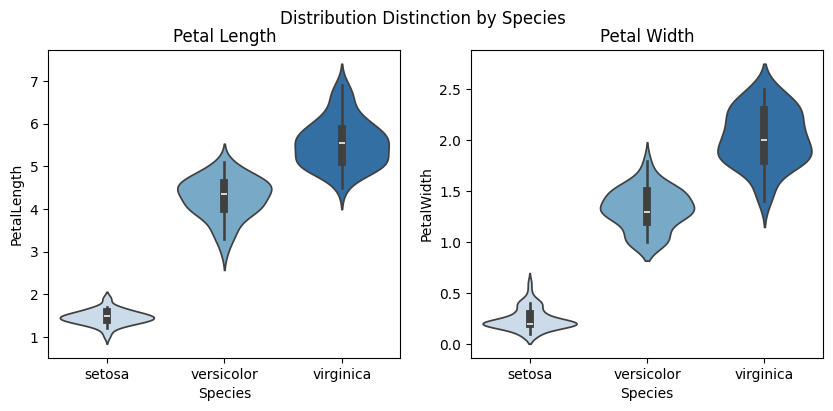

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Distribution Distinction by Species')

seaborn.violinplot(ax=axes[0], x='Species',y='PetalLength', hue='Species', data=data, palette="Blues")
axes[0].set_title('Petal Length')

seaborn.violinplot(ax=axes[1], x='Species',y='PetalWidth', hue='Species', data=data, palette="Blues")
axes[1].set_title('Petal Width')

A plot of the petal width vs the petal length shows a clear disinction in the groups while still having some overlap between the versicolor and virginica species.

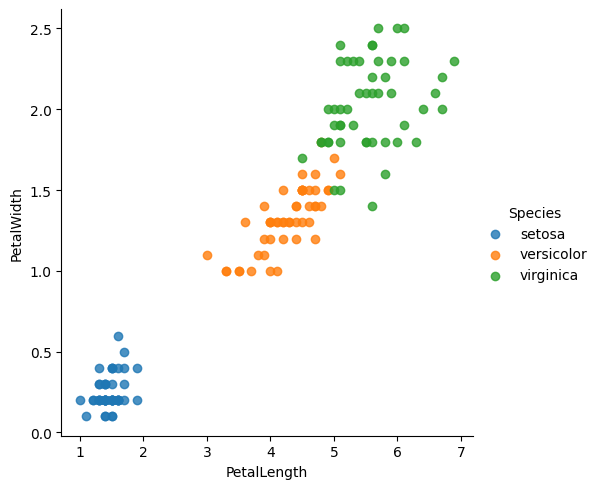

In [8]:
seaborn.lmplot(x='PetalLength',y='PetalWidth', data=data,fit_reg=False,hue='Species')

## Model Comparison

Because we know how many species there are and because the groups are relatively spatially distinct, I am going to use the simple and cheap k-means algorithm. The k-means clustering algorithm randomly selects center points (mean or centroid) for each cluster and assigns points to clusters based on the closest mean point. The center points are then recalculated and the process is iterated a given number of times or until self-consistency (i.e., when there is no change in the centroids within a given tolerance between iteration steps). 

Because petal length and petal width are highly correlated, adding both to the model may not provide any improvement. Let's try both to compare.

In [9]:
model_kmeans1 = KMeans(n_clusters=3)
model_kmeans1.fit(data[['PetalWidth']])
data['labels_kmeans1'] = model_kmeans1.labels_
metrics.adjusted_rand_score(data['Species'],data['labels_kmeans1'])

/home/laurarnichols/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.8856970310281228

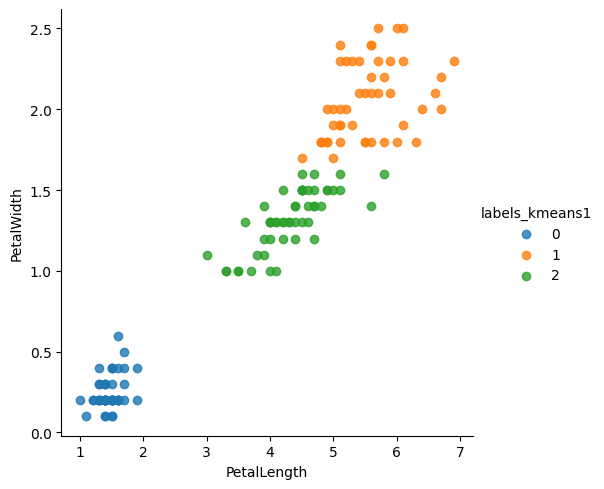

In [10]:
seaborn.lmplot(x='PetalLength',y='PetalWidth', data=data,fit_reg=False,hue='labels_kmeans1')

In [11]:
model_kmeans2 = KMeans(n_clusters=3)
model_kmeans2.fit(data[['PetalWidth','PetalLength']])
data['labels_kmeans2'] = model_kmeans2.labels_
metrics.adjusted_rand_score(data['Species'],data['labels_kmeans2'])

/home/laurarnichols/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.8856970310281228

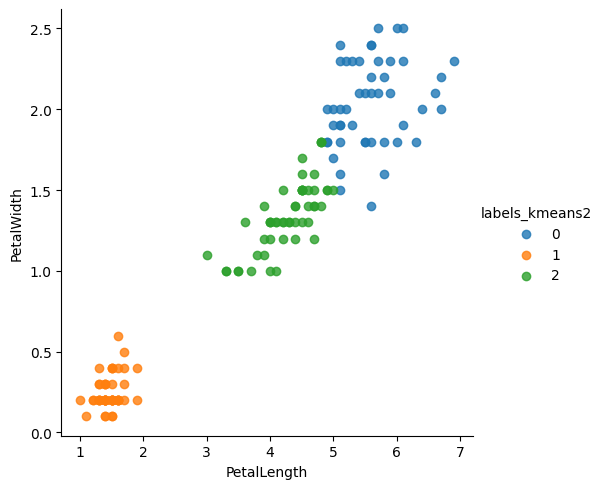

In [12]:
seaborn.lmplot(x='PetalLength',y='PetalWidth', data=data,fit_reg=False,hue='labels_kmeans2')

Within this data set, the model with just petal width does well, with no improvement on adding petal length. It may slightly improve the prediction in a different data set, but the large correlation between the variables means that the improvement will likely be marginal. Just to test, we can also compare a model with petal width, petal length, and sepal length. 

In [13]:
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans3.fit(data[['PetalWidth','PetalLength', 'SepalLength']])
data['labels_kmeans3'] = model_kmeans3.labels_
metrics.adjusted_rand_score(data['Species'],data['labels_kmeans3'])

/home/laurarnichols/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7302382722834697

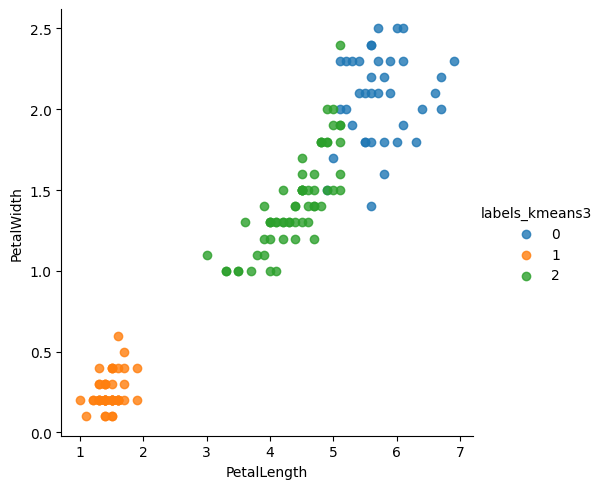

In [14]:
seaborn.lmplot(x='PetalLength',y='PetalWidth', data=data,fit_reg=False,hue='labels_kmeans3')

The model with three variables is worse than those with just petal width and length. This suggests that the information found in the petal length and width variables is diluted by adding another feature to the model.

To test this, we can break the features into principal components. This is a transformation of the data to new "features" that have decreasing impact on the species classification. The drawback of this is that the results become harder to interpret, but it may give an improvement in the classification accuracy.

In [15]:
allFeatures = data[['SepalWidth','SepalLength','PetalWidth','PetalLength']]

In [16]:
pcaAll = PCA()
pcaAll.fit(allFeatures)
pcaAll.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Clearly there is only one principal component that has a significant explanatory power, which is expected since petal length and width are so highly correlated. Just use the first principal component.

In [17]:
pca1 = PCA(n_components=1)
pca1.fit(allFeatures)
transformed = pca1.transform(allFeatures)

# Performed k-means clustering on top principal component
model_kmeans1pca = KMeans(n_clusters=3)
model_kmeans1pca.fit(transformed)
data['labels_kmeans1pca'] = model_kmeans1pca.labels_
metrics.adjusted_rand_score(data['Species'],data['labels_kmeans1pca'])

/home/laurarnichols/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7726314170414115

In this case, the principal component analysis does not provide an improvement in the model, and the k-means model with only petal width is the best choice within those considered.